<a href="https://colab.research.google.com/github/ManavMoitra/Neural-Networks/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

In [34]:
transform = transforms.ToTensor()

In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [36]:
trainset=torchvision.datasets.MNIST(root="/data",train=True,transform=transform,download=True)

In [37]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [122]:
dataiter=iter(trainloader)
images,labels=dataiter.next()


torch.Size([4, 1, 28, 28])
tensor([3, 0, 8, 8])


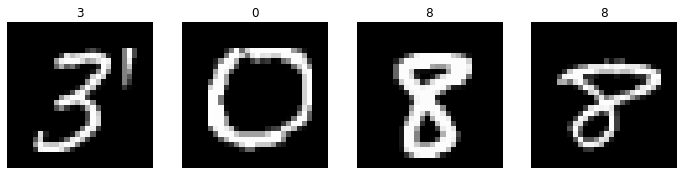

In [39]:
for batch_1 in trainloader:
    batch = batch_1
    break
 
print(batch[0].shape) # as batch[0] contains the image pixels -> tensors
print(batch[1]) # batch[1] contains the labels -> tensors
 
plt.figure(figsize=(12, 8))
for i in range (batch[0].shape[0]):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(batch[0][i].reshape(28, 28), cmap='gray')
    plt.title(int(batch[1][i]))
    plt.savefig('digit_mnist.png')
plt.show()

In [90]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.CNN=nn.Sequential(
        nn.Conv2d(1,6,5),#(N,1,28,28)->(N,6,24,24)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),#(N,6,24,24)->(N,6,12,12)
        nn.Conv2d(6,16,3),#(N,6,12,12)->(N,16,10,10)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2)#(N,16,10,10)->(N,16,5,5)
    )
    self.fcn=nn.Sequential(
        nn.Linear(400,120),
        nn.ReLU(),
        nn.Linear(120,84),
        nn.ReLU(),
        nn.Linear(84,10)
    )  

  def forward(self,x):
    x=self.CNN(x) 
    x=x.view(x.size(0),-1)
    x=self.fcn(x)
    return x



        



    

In [123]:
batch_size = 64
trainset = torchvision.datasets.MNIST(root='mnist_data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='mnist_data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [124]:
def evaluation(Dataloader):
  correct,total=0,0
  for data in Dataloader:
    inputs,labels=data[0].to(device),data[1].to(device)
    outputs=net(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return correct/total*100


In [125]:
net=LeNet().to(device)
loss_fn=F.cross_entropy

opt=optim.Adam(net.parameters())


Epoch: 0/30, Test acc: 97.21, Train acc: 96.62
Epoch: 1/30, Test acc: 97.86, Train acc: 97.75
Epoch: 2/30, Test acc: 98.54, Train acc: 98.34
Epoch: 3/30, Test acc: 98.57, Train acc: 98.45
Epoch: 4/30, Test acc: 98.71, Train acc: 98.81
Epoch: 5/30, Test acc: 98.79, Train acc: 98.88
Epoch: 6/30, Test acc: 98.86, Train acc: 99.11
Epoch: 7/30, Test acc: 99.06, Train acc: 99.41
Epoch: 8/30, Test acc: 99.01, Train acc: 99.33
Epoch: 9/30, Test acc: 98.99, Train acc: 99.41
Epoch: 10/30, Test acc: 98.95, Train acc: 99.41
Epoch: 11/30, Test acc: 99.12, Train acc: 99.54
Epoch: 12/30, Test acc: 99.02, Train acc: 99.62
Epoch: 13/30, Test acc: 98.77, Train acc: 99.32
Epoch: 14/30, Test acc: 98.99, Train acc: 99.66
Epoch: 15/30, Test acc: 98.94, Train acc: 99.59
Epoch: 16/30, Test acc: 99.09, Train acc: 99.83
Epoch: 17/30, Test acc: 98.97, Train acc: 99.66
Epoch: 18/30, Test acc: 98.99, Train acc: 99.73
Epoch: 19/30, Test acc: 98.86, Train acc: 99.66
Epoch: 20/30, Test acc: 99.28, Train acc: 99.90
Ep

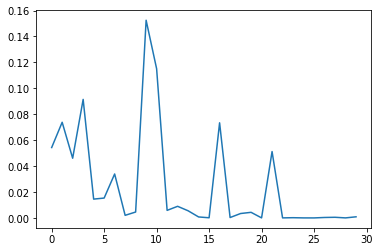

In [126]:
loss_arr=[]
loss_epoch_arr=[]
max_epochs=30
for epoch in range(max_epochs):
  for i,data in enumerate(trainloader):
    inputs,labels=data[0].to(device),data[1].to(device)

    outputs=net(inputs)
    loss=loss_fn(outputs,labels)
    opt.zero_grad()
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))


plt.plot(loss_epoch_arr)
plt.show()

In [127]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, ( 1,2,0)))
    plt.show()


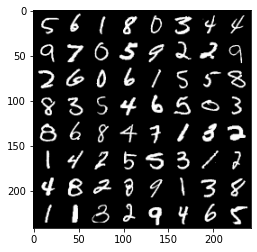

In [128]:
imshow(torchvision.utils.make_grid(images))

In [129]:
net = net.to('cpu')

In [130]:
out = net(images)
print(out.shape)

torch.Size([64, 10])


In [131]:
out = net.CNN[0](images)
out.shape

torch.Size([64, 6, 24, 24])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


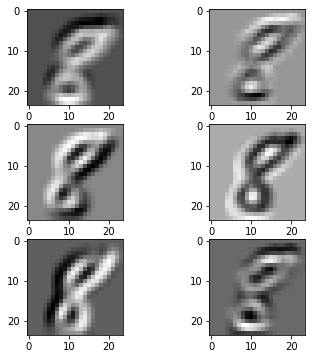

In [133]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()